# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
# Installed citipy by - !pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

#Select units of Farenheit
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

In [4]:
city_name = []  # response['name']
lng=[]  # response['coord.lon']
lat=[]  # response['coord.lat']
time_zone = []  # response['timezone']
temp=[]  # response['main.temp']
humidity=[]  # response['main.humidity']
cloudiness=[]  # response['clouds.all']
wind_speed=[]  # response['wind.speed']

print(f"Beginning Data Retrieval \n-------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        time_zone.append(response['timezone'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing Record {cities.index(city)} | {city}")
    except KeyError:
        print('Key Error')
    except ConnectionError:
        print('ConnectionError')
    time.sleep(1)

Beginning Data Retrieval 
-------------------------
Processing Record 0 | castro
Processing Record 1 | yellowknife
Processing Record 2 | punta arenas
Processing Record 3 | ushuaia
Processing Record 4 | male
Processing Record 5 | albany
Key Error
Processing Record 7 | puerto ayora
Processing Record 8 | georgetown
Processing Record 9 | avarua
Key Error
Processing Record 11 | norman wells
Processing Record 12 | rikitea
Processing Record 13 | hithadhoo
Processing Record 14 | busselton
Processing Record 15 | salihli
Processing Record 16 | yumen
Processing Record 17 | lebu
Processing Record 18 | cape town
Processing Record 19 | provideniya
Processing Record 20 | atuona
Processing Record 21 | new norfolk
Processing Record 22 | ostrovnoy
Processing Record 23 | nanortalik
Processing Record 24 | esperance
Processing Record 25 | kodiak
Processing Record 26 | cabedelo
Processing Record 27 | saint george
Processing Record 28 | hobart
Key Error
Processing Record 30 | sept-iles
Processing Record 31 |

Processing Record 266 | husavik
Processing Record 267 | karasjok
Key Error
Processing Record 269 | bignona
Processing Record 270 | filingue
Processing Record 271 | tasiilaq
Processing Record 272 | samarkand
Processing Record 273 | wamba
Processing Record 274 | katiola
Processing Record 275 | dunedin
Processing Record 276 | wisconsin rapids
Processing Record 277 | reo
Processing Record 278 | meulaboh
Processing Record 279 | cobija
Processing Record 280 | hanzhong
Key Error
Processing Record 282 | padang
Processing Record 283 | lukovetskiy
Processing Record 284 | dalbandin
Processing Record 285 | tomatlan
Processing Record 286 | constantine
Processing Record 287 | babushkin
Processing Record 288 | chambersburg
Processing Record 289 | labuhan
Processing Record 290 | homer
Processing Record 291 | vicksburg
Processing Record 292 | bambous virieux
Processing Record 293 | vaitape
Processing Record 294 | grootfontein
Processing Record 295 | nemuro
Processing Record 296 | kenai
Processing Recor

Processing Record 527 | palembang
Processing Record 528 | palmer
Processing Record 529 | pahrump
Processing Record 530 | vostok
Processing Record 531 | santa maria
Key Error
Key Error
Processing Record 534 | port lincoln
Processing Record 535 | panjab
Processing Record 536 | wasilla
Processing Record 537 | chernaya kholunitsa
Key Error
Processing Record 539 | korla
Processing Record 540 | sakakah
Processing Record 541 | sorong
Processing Record 542 | rathdrum
Processing Record 543 | loandjili
Key Error
Processing Record 545 | tsabong
Processing Record 546 | richards bay
Processing Record 547 | contamana
Processing Record 548 | vacaria
Processing Record 549 | requena
Processing Record 550 | avera
Processing Record 551 | kaohsiung
Processing Record 552 | kupino
Processing Record 553 | chifeng
Processing Record 554 | zaykovo
Processing Record 555 | mujiayingzi
Processing Record 556 | malatya
Processing Record 557 | moorhead
Processing Record 558 | hamilton
Processing Record 559 | ormara
P

Above is my json query.  I added row by row and tracked the progress of the data capture with the print command.  I used the try except to filter out cities that were generated by citypy that were not identified in the openweather query.  Below is the sample data pull.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({
    'name':city_name,
    'longitude':lng,
    'latitude':lat,
    'time':time_zone,
    'temp':temp,
    'humidity':humidity,
    'cloudiness':cloudiness,
    'wind_speed':wind_speed
})

In [7]:
weather_df.head()

,name,longitude,latitude,time,temp,humidity,cloudiness,wind_speed
0,Chokurdakh,147.90,70.62,39600,25.71,87,100,24.73
1,Castro,-73.76,-42.48,-10800,35.60,100,0,4.70
2,Codrington,153.24,-28.95,36000,73.49,35,0,8.05
3,Inhambane,35.38,-23.87,7200,62.16,83,84,4.94
4,Qaanaaq,-69.36,77.48,-10800,32.46,96,100,8.10


In [8]:
weather_df.count()

name          561
longitude     561
latitude      561
time          561
temp          561
humidity      561
cloudiness    561
wind_speed    561
dtype: int64

In [9]:
len(pd.unique(weather_df['name']))


561

Above is my dataframe and I did a check on the number of valid rows.  Also checked to see if the city name is unique and all the values were unique.  Below is the sample results from the template.

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

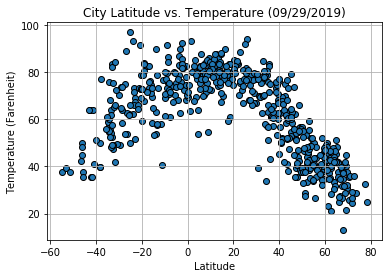

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["latitude"], weather_df["temp"], marker="o", linewidths=1, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (09/29/2019)")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

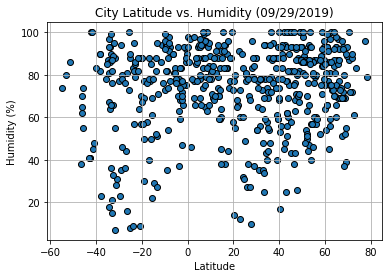

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["latitude"], weather_df["humidity"], marker="o", linewidths=1, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (09/29/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

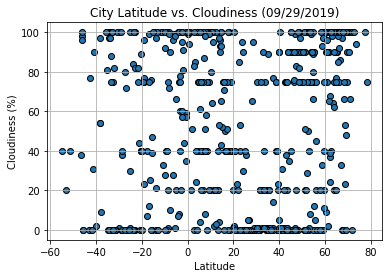

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["latitude"], weather_df["cloudiness"], marker="o",  linewidths=1, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (09/29/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

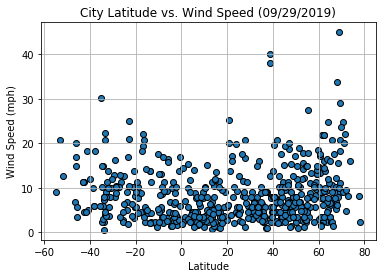

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["latitude"], weather_df["wind_speed"], marker="o",  linewidths=1, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (09/29/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeWindSpeed.png")

# Show plot
plt.show()

In [14]:
weather_df.to_csv(output_data_file)

Three Observations:
The distribution of temperatures by latitude makes a somewhat symetrical distribution.  This makes sense since the northern and southern hemispheres are on opposite seasons.

The warmest regions should be between 20 to -20 degrees latitude year round since this is where the sun rays have the shortest path (based on the time of year/tilt of the earth).  Everything is shifted right because we are at the end of the summer period.

Other trends are difficult to discern; wind speed might be higher in the northern hemisphere and this could be due to the higher temperature and the wind is generated based on temperature/evaporation rates.  Cloudiness seems to be much more likely to be 0 or 100% than the other options.  Humidity seems to be influenced by temperature as expected.
